# Customer Satisfaction Prediction Modeling and Evaluation

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection  import train_test_split
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import mean_absolute_error

# Regression model algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
 # classification model algorithms
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA


In [77]:
cleaned_customer_satisafaction_data = pd.read_csv(r"F:\Vaishnavi\practiced\vs code\Unified Mentor\Customer Satisfaction Prediction\cleaned_customer_satisafaction_data")

In [78]:
company_base_data = cleaned_customer_satisafaction_data.copy()
company_base_data.sample(5)

,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
726,Other,MacBook Pro,2020-04-24,Product inquiry,Software bug,Closed,High,Phone,2023-06-01 15:16:38,2023-06-01 15:21:38,3.0
1708,Other,HP Pavilion,2021-08-20,Cancellation request,Cancellation request,Closed,Low,Chat,2023-06-01 04:40:50,2023-06-01 19:51:50,3.0
1176,Male,Microsoft Office,2020-06-27,Technical issue,Cancellation request,Closed,Critical,Social media,2023-06-01 19:42:32,2023-06-01 20:43:32,3.0
875,Female,PlayStation,2020-08-01,Technical issue,Product recommendation,Closed,Low,Email,2023-05-31 23:04:19,2023-06-01 21:41:19,3.0
1567,Other,GoPro Action Camera,2020-12-18,Technical issue,Software bug,Closed,Medium,Phone,2023-06-01 20:34:25,2023-06-01 17:19:25,4.0


In [79]:
company_base_data.dtypes              

Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Status                    object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

In [80]:
# after saving as csv, it saved as object convert agin to datetime

datetime_cols = ['Time to Resolution', 'First Response Time','Date of Purchase']

company_base_data[datetime_cols] = company_base_data[datetime_cols].apply(pd.to_datetime, errors='coerce')    # coerce: if not converteble don't give error


# Feature Engineering

In [81]:
company_base_data['Resolution_Duration_Hours'] = (company_base_data['Time to Resolution'] - company_base_data['First Response Time']).dt.total_seconds()/3600


In [82]:
# extract date, year and month 
company_base_data['Purchase_Year'] = company_base_data['Date of Purchase'].dt.year
company_base_data['Purchase_Month'] = company_base_data['Date of Purchase'].dt.month
company_base_data['Purchase_Day'] = company_base_data['Date of Purchase'].dt.day

In [83]:
for col in company_base_data.columns:
    unique_values = company_base_data[col].astype(str).unique()
    print(f'{col}: {unique_values}\n')

Customer Gender: ['Other' 'Female' 'Male']

Product Purchased: ['Dell XPS' 'Microsoft Office' 'Autodesk AutoCAD' 'Nintendo Switch'
 'Microsoft Xbox Controller' 'Sony PlayStation' 'Xbox' 'Canon EOS'
 'Fitbit Charge' 'GoPro Action Camera' 'GoPro Hero' 'Google Pixel'
 'HP Pavilion' 'Nintendo Switch Pro Controller' 'LG Smart TV'
 'Nest Thermostat' 'Apple AirPods' 'Sony 4K HDR TV' 'Canon DSLR Camera'
 'Dyson Vacuum Cleaner' 'Roomba Robot Vacuum' 'PlayStation' 'Sony Xperia'
 'Samsung Galaxy' 'Asus ROG' 'Amazon Echo' 'iPhone' 'Google Nest'
 'Adobe Photoshop' 'LG Washing Machine' 'Philips Hue Lights'
 'Bose SoundLink Speaker' 'Garmin Forerunner' 'Samsung Soundbar'
 'MacBook Pro' 'Microsoft Surface' 'LG OLED' 'Amazon Kindle'
 'Bose QuietComfort' 'Fitbit Versa Smartwatch' 'Lenovo ThinkPad' 'Nikon D']

Date of Purchase: ['2020-07-14' '2020-11-13' '2020-02-04' '2021-01-19' '2021-10-24'
 '2020-02-29' '2021-10-13' '2021-03-08' '2020-06-10' '2020-12-26'
 '2021-12-20' '2021-12-09' '2020-10-13' '2021-0

Ticket Status column have only one value, not useful for model

In [84]:
# removing unneccessary columns
column_to_drop1 = ['Date of Purchase','First Response Time','Time to Resolution', 'Ticket Status']
company_base_data = company_base_data.drop(columns=column_to_drop1)

In [85]:
# one hot encoding:  text--> number ;  make it easy for model to understand

categorical_cols = ['Customer Gender', 'Product Purchased', 'Ticket Priority', 'Ticket Channel','Ticket Type','Ticket Subject']


processed_data = pd.get_dummies(company_base_data, columns=categorical_cols, dtype =int, drop_first=True) # drop-firt=True avoid multicoliniarity

In [86]:
processed_data.head()

,Customer Satisfaction Rating,Resolution_Duration_Hours,Purchase_Year,Purchase_Month,Purchase_Day,Customer Gender_Male,Customer Gender_Other,Product Purchased_Amazon Echo,Product Purchased_Amazon Kindle,Product Purchased_Apple AirPods,...,Ticket Subject_Hardware issue,Ticket Subject_Installation support,Ticket Subject_Network problem,Ticket Subject_Payment issue,Ticket Subject_Peripheral compatibility,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug
0,3.0,6.850000,2020,7,14,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.0,-5.533333,2020,11,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,19.683333,2020,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,-17.916667,2021,1,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-2.633333,2021,10,24,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Modeling

In [87]:
# split data
X = processed_data.drop("Customer Satisfaction Rating", axis=1)
y = processed_data["Customer Satisfaction Rating"]


In [88]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2215, 72) (2215,)
Test shape: (554, 72) (554,)


# Modle Building(Regression)

In [89]:
# check baseline performance of Regression model

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
y_pred_r_dummy = dummy_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_r_dummy)
within_one_dummy = np.mean(np.abs(y_test - y_pred_r_dummy) <= 1)

print(f"mae: {mae}")
print(f"Dummy Regressor Within one: {within_one_dummy:.3f}")



mae: 1.19061127364295
Dummy Regressor Within one: 0.413


within_one_dummy calculates how many predicted values are in the tolerance of ±1

Dummyclassifier is used as baseline to evaluate if model learns from data

In [90]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=300,random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "RidgeRegression": Ridge(alpha=1.0)
}

print("Regression Model Performances\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_r = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_r)
    within_one=np.mean(np.abs(y_test - y_pred_r) <= 1)

    print(f"{name}:-->  MAE: {mae:.3f}, Within ±1 : {within_one:.3f}")
          

Regression Model Performances

RandomForest:-->  MAE: 1.241, Within ±1 : 0.430
GradientBoosting:-->  MAE: 1.237, Within ±1 : 0.415
RidgeRegression:-->  MAE: 1.236, Within ±1 : 0.404


Model behaves like dummy model(baseline model)

# Modle Building(Classification)

In [91]:
# check baseline performance of Classification model

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

dummy_acc = dummy.score(X_test, y_test)
print("Dummy Accuracy:", dummy_acc)

Dummy Accuracy: 0.20216606498194944


In [92]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(name, acc)


RandomForest 0.20938628158844766
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 2215, number of used features: 72
[LightGBM] [Info] Start training from score -1.607183
[LightGBM] [Info] Start training from score -1.634582
[LightGBM] [Info] Start training from score -1.554539
[LightGBM] [Info] Start training from score -1.627662
[LightGBM] [Info] Start training from score -1.625365
LGBM 0.18772563176895307


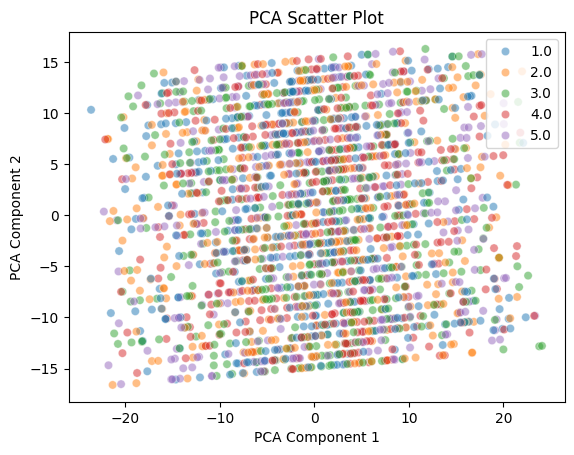

In [93]:

# Reduce features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette='tab10', alpha=0.5)         # c: hue in sns
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Scatter Plot")
plt.legend()
plt.show()

- Model is performing like a Dummyclassifier which indicates poor class seperability
- Scatter plots data point are overlapped means model is getting confused and not able to learn meaningful pattern from data
- The poor performance of model is due to class overlapping and weak separability

# Model Building (classification with Grouped target)

- For regression and classification model is not giving satisfactory result
- Company care more about 'satisfied' or 'not satisfied' than the correct rating

In [94]:
# Example grouping function
def group_rating(x):
    if x <= 2:
        return "Unsatisfied"
    elif x == 3:
        return "Neutral"
    else:  # 4 or 5
        return "Satisfied"

# Create new target columns
y_train_g = y_train.apply(group_rating)
y_test_g  = y_test.apply(group_rating)

# Check counts (optional)
print(y_train_g.value_counts())
print(y_test_g.value_counts())

Customer Satisfaction Rating
Unsatisfied    876
Satisfied      871
Neutral        468
Name: count, dtype: int64
Customer Satisfaction Rating
Unsatisfied    226
Satisfied      216
Neutral        112
Name: count, dtype: int64


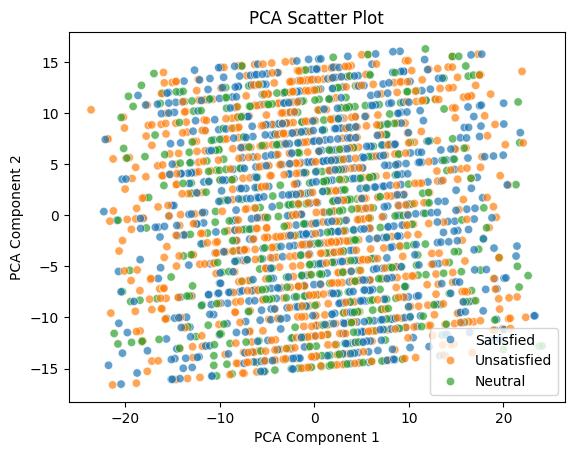

In [95]:

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train_g, palette='tab10', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Scatter Plot")
plt.legend()
plt.show()

Learnings:
- The data points are overlapped indicating weak class seperability which resuls in regression and classification models working same as of dummy models.
- Even after grouping of target, datapoint remains overlapped making difficult to build model
- To build a model more informative features will be needed